In [1]:
import sys

sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

from utils import constants

In [2]:
# First, define the processing functions
def process_groups(groups):
    all_max_auc = []
    all_max_mad = []
    for (layer, unit), group in groups:
        max_auc = group["AUC"].max()
        max_mad = group["MAD"].max()
        all_max_auc.append(max_auc)
        all_max_mad.append(max_mad)
    return np.array(all_max_auc), np.array(all_max_mad)


def get_metrics_string(auc_mean, auc_lower, auc_upper, mad_mean, mad_std, bold=False):
    """Format metrics as LaTeX strings with optional bold formatting"""
    auc_str = f"{auc_mean:.2f} ({auc_lower:.2f}-{auc_upper:.2f})"
    mad_str = f"{mad_mean:.2f}\\(\\pm\\){mad_std:.2f}"

    if bold:
        auc_str = f"\\textbf{{{auc_str}}}"
        mad_str = f"\\textbf{{{mad_str}}}"

    return auc_str, mad_str


def get_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2.0, n - 1)
    lower = m - h
    upper = m + h
    return lower, upper


def process_dataframe_for_metric(df, metric_type):
    """Process dataframe for a specific metric type (mean or max)"""
    if metric_type == "mean":
        auc_mean = df["AUC"].mean()
        auc_lower, auc_upper = get_confidence_interval(df["AUC"])
        mad_mean = df["MAD"].mean()
        mad_std = df["MAD"].std()
    elif metric_type == "max":
        groups = df.groupby(["layer", "unit"])
        auc_values, mad_values = process_groups(groups)
        auc_mean = auc_values.mean()
        auc_lower, auc_upper = get_confidence_interval(auc_values)
        mad_mean = mad_values.mean()
        mad_std = mad_values.std()

    return auc_mean, auc_lower, auc_upper, mad_mean, mad_std


In [3]:
# Define base results path
base_path = f"../{constants.RESULTS_PATH}"

SUBSET_SIZE = 1000
TEXT_GENERATOR_NAME = "gemini-1-5-pro"
EVALUATION_TEXT_GENERATOR_NAME = "gemini-1-5-pro"


# GPT2-XL model files
gpt2xl_explain_original = (
    f"{base_path}/cosy-evaluation_GPT-explain_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
gpt2xl_prism = (
    f"{base_path}/cosy-evaluation_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
meta_gpt2xl = (
    f"{base_path}/meta-evaluation_cosine-similarity_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
# GPT2-Small-SAE model files
gpt2sae_output_centric = (
    f"{base_path}/cosy-evaluation_output-centric_target-gpt2-small-sae_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
gpt2sae_prism = (
    f"{base_path}/cosy-evaluation_target-gpt2-small-sae_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
meta_gpt2_sae = (
    f"{base_path}/meta-evaluation_cosine-similarity_target-gpt2-small-sae_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
# Llama 3.1 model files
llama31_output_centric = (
    f"{base_path}/cosy-evaluation_output-centric_target-Llama-3.1-8B-Instruct_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
llama31_prism = (
    f"{base_path}/cosy-evaluation_target-Llama-3.1-8B-Instruct_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
meta_llama31 = (
    f"{base_path}/meta-evaluation_cosine-similarity_target-Llama-3.1-8B-Instruct_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
# Gemma model files
gemma_output_centric = (
    f"{base_path}/cosy-evaluation_output-centric_target-gemma-scope-2b_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
gemma_prism = (
    f"{base_path}/cosy-evaluation_target-gemma-scope-2b_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)
meta_gemma_sae = (
    f"{base_path}/meta-evaluation_cosine-similarity_target-gemma-scope-2b_textgen-{TEXT_GENERATOR_NAME}_mean_"
    f"evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
)

# Load dataframes with descriptive names
# GPT2-XL dataframes
df_gpt2xl_explain = pd.read_csv(gpt2xl_explain_original)
df_gpt2xl_prism = pd.read_csv(gpt2xl_prism)
df_meta_gpt2xl = pd.read_csv(meta_gpt2xl)

# GPT2-Small-SAE dataframes
df_gpt2sae_output = pd.read_csv(gpt2sae_output_centric)
df_gpt2sae_prism = pd.read_csv(gpt2sae_prism)
df_meta_gpt2_sae = pd.read_csv(meta_gpt2_sae)

# Llama 3.1 dataframes
df_llama31_output = pd.read_csv(llama31_output_centric)
df_llama31_prism = pd.read_csv(llama31_prism)
df_meta_llama31 = pd.read_csv(meta_llama31)

# Gemma dataframes
df_gemma_output = pd.read_csv(gemma_output_centric)
df_gemma_prism = pd.read_csv(gemma_prism)
df_meta_gemma_sae = pd.read_csv(meta_gemma_sae)

## Benchmark Results

In [5]:
def generate_latex_benchmark_table():
    # Define our models and their feature types
    models = {
        "GPT-2 XL": "MLP neuron",
        "Llama 3.1 8B Instruct": "MLP neuron",
        "GPT-2 Small": "resid. SAE feature",
        "Gemma Scope": "resid. SAE feature",
    }

    # Define our methods
    methods = ["\\method\\ (max)", "\\method\\ (mean)", "GPT-Explain", "Output-Centric"]

    # Define our dataframes (assuming these are already loaded)
    dataframes = {
        "GPT-2 XL": {
            "prism_max": df_gpt2xl_prism,  # For \method\ (max)
            "prism_mean": df_gpt2xl_prism,  # For \method\ (mean)
            "output_centric": None,  # Not available
            "gpt_explain": df_gpt2xl_explain,
        },
        "Llama 3.1 8B Instruct": {
            "prism_max": df_llama31_prism,
            "prism_mean": df_llama31_prism,
            "output_centric": df_llama31_output,
            "gpt_explain": None,
        },
        "GPT-2 Small": {
            "prism_max": df_gpt2sae_prism,
            "prism_mean": df_gpt2sae_prism,
            "output_centric": df_gpt2sae_output,
            "gpt_explain": None,
        },
        "Gemma Scope": {
            "prism_max": df_gemma_prism,
            "prism_mean": df_gemma_prism,
            "output_centric": df_gemma_output,
            "gpt_explain": None,
        },
    }

    # Define which methods have bold values for each model based on the example
    bold_values = {
        "\\method\\ (max)": ["GPT-2 XL", "Llama 3.1 8B Instruct", "GPT-2 Small"],
        "Output-Centric": ["Gemma Scope"],
    }

    # Map method names to dataframe keys
    method_to_df_key = {
        "\\method\\ (max)": "prism_max",
        "\\method\\ (mean)": "prism_mean",
        "GPT-Explain": "gpt_explain",
        "Output-Centric": "output_centric",
    }

    # Start building the table
    table = []
    table.append(r"\begin{table}[t]")
    table.append(
        r"\caption{Benchmarking feature description methods. AUC reflects classification performance, while MAD "
        r"measures activation differences between target and control descriptions. \method\ (max) reports the "
        r"best-matching score per feature; (mean) averages over all descriptions. Values are means across selected "
        r"features from early, middle, and late layers. AUC includes 95\% confidence intervals; MAD includes standard "
        r"deviations. Bold indicates best performance; dashes denote unavailable descriptions for certain models. See "
        r"Appendix~\ref{app:sec:bench-details} for details.}"
    )
    table.append(r"    \vspace{6pt}")
    table.append(r"    \label{tab:benchmark}")
    table.append(r"    \centering")
    table.append(r"    \resizebox{\textwidth}{!}{")
    table.append(r"    \begin{tabular}{l" + "cc" * len(models) + "}")
    table.append(r"    \toprule")

    # First header row with model names spanning 2 columns each
    header1 = [r"    \multirow{3}{*}{Method}"]
    for model in models:
        header1.append(r"    \multicolumn{2}{c}{" + model + "}")
    table.append(" &\n".join(header1) + r" \\")

    # Second header row with feature types in parentheses
    header2 = ["    "]
    for model, feature_type in models.items():
        header2.append(r"    \multicolumn{2}{c}{(" + feature_type + r")}")
    table.append(" &\n".join(header2) + r" \\")

    # Create the column separators
    cmidrules = []
    for i in range(len(models)):
        col_start = 2 + (i * 2)
        col_end = col_start + 1
        cmidrules.append(rf"    \cmidrule(r){{{col_start}-{col_end}}}")
    table.append(" ".join(cmidrules))

    # Third header row with AUC and MAD for each model
    header3 = ["    "]
    for _ in models:
        header3.append(r"AUC (\(\uparrow\))")
        header3.append(r"MAD (\(\uparrow\))")
    table.append(" & ".join(header3) + r" \\")

    table.append(r"    \midrule")

    # Process each method as a row
    for method in methods:
        df_key = method_to_df_key[method]
        row = [f"    {method}"]

        # For each model
        for model in models:
            df = dataframes[model][df_key]

            if df is not None:
                # Determine if this should be bold
                is_bold = model in bold_values.get(method, [])

                # For max metrics
                if df_key == "prism_max":
                    auc_mean, auc_lower, auc_upper, mad_mean, mad_std = process_dataframe_for_metric(df, "max")
                else:
                    auc_mean, auc_lower, auc_upper, mad_mean, mad_std = process_dataframe_for_metric(df, "mean")

                auc_str, mad_str = get_metrics_string(auc_mean, auc_lower, auc_upper, mad_mean, mad_std, bold=is_bold)
                row.append(f"{auc_str} & {mad_str}")
            else:
                row.append("--- & ---")

        table.append(" & ".join(row) + r" \\")

    table.append(r"    \bottomrule")
    table.append(r"    \end{tabular}")
    table.append(r"    }")
    table.append(r"\end{table}")

    return "\n".join(table)


# Generate and print the table
latex_table = generate_latex_benchmark_table()
print(latex_table)

\begin{table}[t]
\caption{Benchmarking feature description methods. AUC reflects classification performance, while MAD measures activation differences between target and control descriptions. \method\ (max) reports the best-matching score per feature; (mean) averages over all descriptions. Values are means across selected features from early, middle, and late layers. AUC includes 95\% confidence intervals; MAD includes standard deviations. Bold indicates best performance; dashes denote unavailable descriptions for certain models. See Appendix~\ref{app:sec:bench-details} for details.}
    \vspace{6pt}
    \label{tab:benchmark}
    \centering
    \resizebox{\textwidth}{!}{
    \begin{tabular}{lcccccccc}
    \toprule
    \multirow{3}{*}{Method} &
    \multicolumn{2}{c}{GPT-2 XL} &
    \multicolumn{2}{c}{Llama 3.1 8B Instruct} &
    \multicolumn{2}{c}{GPT-2 Small} &
    \multicolumn{2}{c}{Gemma Scope} \\
     &
    \multicolumn{2}{c}{(MLP neuron)} &
    \multicolumn{2}{c}{(MLP neuron)} &
 

## Sanity Checks

In [13]:
base_path = f"../{constants.RESULTS_PATH}"

SUBSET_SIZE = 1000
TEXT_GENERATOR_NAME = "gemini-1-5-pro"

# GPT2-XL model files
baseline_path = f"{base_path}/cosy-evaluation_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
rnd_sentences_path = f"{base_path}/random_sentences_cosy-evaluation_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
rnd_descriptions_path = f"{base_path}/random_descriptions_cosy-evaluation_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
section_0_0_path = f"{base_path}/start_interval_0-0_cosy-evaluation_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
section_0_25_path = f"{base_path}/start_interval_0-25_cosy-evaluation_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
section_0_5_path = f"{base_path}/start_interval_0-5_cosy-evaluation_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"
section_0_75_path = f"{base_path}/start_interval_0-75_cosy-evaluation_target-gpt2-xl_textgen-{TEXT_GENERATOR_NAME}_mean_evalgen-{EVALUATION_TEXT_GENERATOR_NAME}_cosmopedia_{SUBSET_SIZE}.csv"

baseline_df = pd.read_csv(baseline_path)
rnd_sentences_df = pd.read_csv(rnd_sentences_path)
rnd_descriptions_df = pd.read_csv(rnd_descriptions_path)
section_0_0_df = pd.read_csv(section_0_0_path)
section_0_25_df = pd.read_csv(section_0_25_path)
section_0_5_df = pd.read_csv(section_0_5_path)
section_0_75_df = pd.read_csv(section_0_75_path)

In [15]:
def generate_latex_ablation_table():
    # Process all datasets
    methods = {
        "baseline": "Baseline",
        "random_sentences": "Random Sentences",
        "random_descriptions": "Random Descriptions",
        "section_0_0": "0.0 to 0.25",
        "section_0_25": "0.25 to 0.5",
        "section_0_5": "0.5 to 0.75",
        "section_0_75": "0.75 to 1.0",
    }

    dataframes = {
        "baseline": {
            "prism_max": baseline_df,
            "prism_mean": baseline_df,
        },
        "random_sentences": {
            "prism_max": rnd_sentences_df,
            "prism_mean": rnd_sentences_df,
        },
        "random_descriptions": {
            "prism_max": rnd_descriptions_df,
            "prism_mean": rnd_descriptions_df,
        },
        "section_0_0": {
            "prism_max": section_0_0_df,
            "prism_mean": section_0_0_df,
        },
        "section_0_25": {
            "prism_max": section_0_25_df,
            "prism_mean": section_0_25_df,
        },
        "section_0_5": {
            "prism_max": section_0_5_df,
            "prism_mean": section_0_5_df,
        },
        "section_0_75": {
            "prism_max": section_0_75_df,
            "prism_mean": section_0_75_df,
        },
    }

    # Start building the table
    table = []
    table.append(r"\begin{table}[t]")
    table.append(r"    \caption{Sanity checks. Target model: GPT-2 XL.}")
    table.append(r"    \label{tab:sanity-checks}")
    table.append(r"    \centering")
    table.append(r"    % \resizebox{\textwidth}{!}{")
    table.append(r"    \begin{tabular}{l*{4}{c}}")
    table.append(r"    \toprule")
    table.append(r"    & \multicolumn{2}{c}{\method\ (max)} & \multicolumn{2}{c}{\method\ (mean)} \\")
    table.append(r"    \cmidrule(r){2-3} \cmidrule(r){4-5}")
    table.append(r"    & AUC (\(\uparrow\)) & MAD (\(\uparrow\)) & AUC (\(\uparrow\)) & MAD (\(\uparrow\)) \\")
    table.append(r"    \midrule")

    # Process each model
    for method_name, method_description in methods.items():
        row = [f"    {method_description}"]

        # For each metric type
        for metric_type in ["prism_max", "prism_mean"]:
            df = dataframes[method_name][metric_type]

            if df is not None:
                # For max metrics
                if metric_type == "prism_max":
                    auc_mean, auc_lower, auc_upper, mad_mean, mad_std = process_dataframe_for_metric(df, "max")
                else:
                    auc_mean, auc_lower, auc_upper, mad_mean, mad_std = process_dataframe_for_metric(df, "mean")

                auc_str, mad_str = get_metrics_string(auc_mean, auc_lower, auc_upper, mad_mean, mad_std, bold=False)
                row.append(f"{auc_str} & {mad_str}")

        table.append(" & ".join(row) + r" \\")

    table.append(r"    \bottomrule")
    table.append(r"    \end{tabular}")
    table.append(r"    % }")
    table.append(r"\end{table}")

    return "\n".join(table)


# Generate and print the table
latex_ablation_table = generate_latex_ablation_table()
print(latex_ablation_table)

\begin{table}[t]
    \caption{Sanity checks. Target model: GPT-2 XL.}
    \label{tab:sanity-checks}
    \centering
    % \resizebox{\textwidth}{!}{
    \begin{tabular}{l*{4}{c}}
    \toprule
    & \multicolumn{2}{c}{\method\ (max)} & \multicolumn{2}{c}{\method\ (mean)} \\
    \cmidrule(r){2-3} \cmidrule(r){4-5}
    & AUC (\(\uparrow\)) & MAD (\(\uparrow\)) & AUC (\(\uparrow\)) & MAD (\(\uparrow\)) \\
    \midrule
    Baseline & 0.85 (0.78-0.91) & 2.98\(\pm\)3.16 & 0.65 (0.61-0.69) & 1.24\(\pm\)2.54 \\
    Random Sentences & 0.68 (0.59-0.76) & 1.44\(\pm\)2.21 & 0.54 (0.50-0.58) & 0.61\(\pm\)2.13 \\
    Random Descriptions & 0.65 (0.56-0.74) & 1.35\(\pm\)2.36 & 0.52 (0.48-0.57) & 0.52\(\pm\)2.19 \\
    0.0 to 0.25 & 0.69 (0.61-0.77) & 1.57\(\pm\)2.32 & 0.53 (0.49-0.57) & 0.55\(\pm\)2.20 \\
    0.25 to 0.5 & 0.74 (0.66-0.82) & 2.04\(\pm\)2.65 & 0.56 (0.52-0.61) & 0.75\(\pm\)2.35 \\
    0.5 to 0.75 & 0.71 (0.63-0.79) & 2.02\(\pm\)3.29 & 0.55 (0.51-0.60) & 0.72\(\pm\)2.42 \\
    0.75 to 1.0

## Cosine Similarity

In [51]:
def analyze_cosine_similarity(model_name, meta_df, prism_df, other_df):
    print(f"\n{'-' * 50}")
    print(f"Model: {model_name}")
    print(f"{'-' * 50}")

    # Load the cosine similarity dataframe
    try:
        # Find max cosine similarity
        max_idx = meta_df["cosine_similarity"].idxmax()
        max_val = meta_df["cosine_similarity"].max()
        max_row = meta_df.iloc[int(max_idx)]

        # Find min cosine similarity
        min_idx = meta_df["cosine_similarity"].idxmin()
        min_val = meta_df["cosine_similarity"].min()
        min_row = meta_df.iloc[int(min_idx)]

        # Print max and min information
        print("Maximum cosine similarity:")
        print(f"  Index: {int(max_idx)}")
        print(f"  Value: {max_val:.2f}")
        print(f"  Details: {max_row.to_dict()}")

        print("\nMinimum cosine similarity:")
        print(f"  Index: {int(min_idx)}")
        print(f"  Value: {min_val:.2f}")
        print(f"  Details: {min_row.to_dict()}")

        # Extract and print example explanations for max cosine similarity
        max_layer = int(max_row.get("layer", 0))  # Default to 0 if not present
        max_unit = int(max_row.get("unit", 0))  # Default to 0 if not present

        print(f"\nExamples for maximum cosine similarity (Layer {max_layer}, Unit {max_unit}):")

        # Get prism max explanations
        prism_exp_max = prism_df.loc[
            (prism_df["layer"] == max_layer) & (prism_df["unit"] == max_unit), "explanation"
        ].to_numpy()
        print(f"PRISM max explanation:\n{prism_exp_max}")

        # Get other max explanation
        other_exp_max = other_df.loc[
            (other_df["layer"] == max_layer) & (other_df["unit"] == max_unit), "explanation"
        ].to_numpy()
        print(f"Other max explanation:\n{other_exp_max}")

        # Extract and print example explanations for min cosine similarity
        min_layer = int(min_row.get("layer", 0))  # Default to 0 if not present
        min_unit = int(min_row.get("unit", 0))  # Default to 0 if not present

        print(f"\nExamples for minimum cosine similarity (Layer {min_layer}, Unit {min_unit}):")

        # Get prism min explanations
        prism_exp_min = prism_df.loc[
            (prism_df["layer"] == min_layer) & (prism_df["unit"] == min_unit), "explanation"
        ].to_numpy()
        print(f"Prism min explanation:\n{prism_exp_min}")

        # Get other explanations
        other_exp_min = other_df.loc[
            (other_df["layer"] == min_layer) & (other_df["unit"] == min_unit), "explanation"
        ].to_numpy()
        print(f"Other min explanation:\n{other_exp_min}")

    except Exception as e:
        print(f"Error analyzing {model_name}: {e!s}")


# Function to analyze all four models
def analyze_all_models():
    """Analyzes cosine similarity for all four models.

    Returns:
    - Tuple of analysis results
    """
    # Model 1: GPT2-XL
    meta_gpt2xl_result = analyze_cosine_similarity("GPT-2 XL", df_meta_gpt2xl, df_gpt2xl_prism, df_gpt2xl_explain)

    # Model 2: GPT2-Small-SAE
    meta_gpt2_sae_result = analyze_cosine_similarity(
        "GPT-2 Small SAE", df_meta_gpt2_sae, df_gpt2sae_prism, df_gpt2sae_output
    )
    # Model 3: Llama 3.1
    meta_llama31_result = analyze_cosine_similarity(
        "Llama 3.1 8B Instruct", df_meta_llama31, df_llama31_prism, df_llama31_output
    )

    # Model 4: Gemma 2b
    meta_gemma_sae_result = analyze_cosine_similarity(
        "Gemma Scope", df_meta_gemma_sae, df_gemma_prism, df_gemma_output
    )

    return meta_gemma_sae_result, meta_llama31_result, meta_gpt2_sae_result, meta_gpt2xl_result


# Call the function to analyze all models
analyze_all_models()


--------------------------------------------------
Model: GPT-2 XL
--------------------------------------------------
Maximum cosine similarity:
  Index: 1
  Value: 0.66
  Details: {'layer': 0.0, 'unit': 1149.0, 'cosine_similarity': 0.6624007850885392, 'cosine_similarity_random': 0.3408570021390915, 'max_auc': 0.651, 'max_mad': 0.52172785235702}

Minimum cosine similarity:
  Index: 52
  Value: 0.35
  Details: {'layer': 40.0, 'unit': 4055.0, 'cosine_similarity': 0.3493856728076935, 'cosine_similarity_random': 0.4937832593917847, 'max_auc': 0.9772, 'max_mad': 3.160600090063997}

Examples for maximum cosine similarity (Layer 0, Unit 1149):
PRISM max explanation:
['First-person experiences, often involving personal recollections, observations, or opinions, especially related to clothing, accessories, food, or technology'
 'First-person introspection, often related to mental and emotional states, self-awareness, and personal beliefs'
 'First-person perspective related to identification, pe

(None, None, None, None)

## Layer Comparison

In [9]:
COLORS = ["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628", "#984ea3", "#999999", "#e41a1c", "#dede00"]
MODEL_NAMES = ["GPT-2 XL", "Llama 3.1-8B Instruct", "GPT-2 Small SAE", "Gemma Scope"]
MARKERS = ["o", "s", "^", "D"]
LINESTYLES = ["-", "--", ":", "-."]  # solid, dashed, dotted, dash-dot
LABEL_FONTSIZE = 20
AXIS_FONTSIZE = 15
LEGEND_FONTSIZE = 12


def load_model_data(df, metric="max_auc"):
    layers = df.groupby("layer", as_index=False).mean()
    layers_std = df.groupby("layer", as_index=False).std()
    layers_dict = dict(zip(layers["layer"], layers[metric], strict=False))
    layers_dict_std = dict(zip(layers_std["layer"], layers_std[metric], strict=False))

    x, y = zip(*sorted(layers_dict.items()), strict=False)
    std = [layers_dict_std[i] for i in x]

    return x, y, std

### AUC Layer Comparison

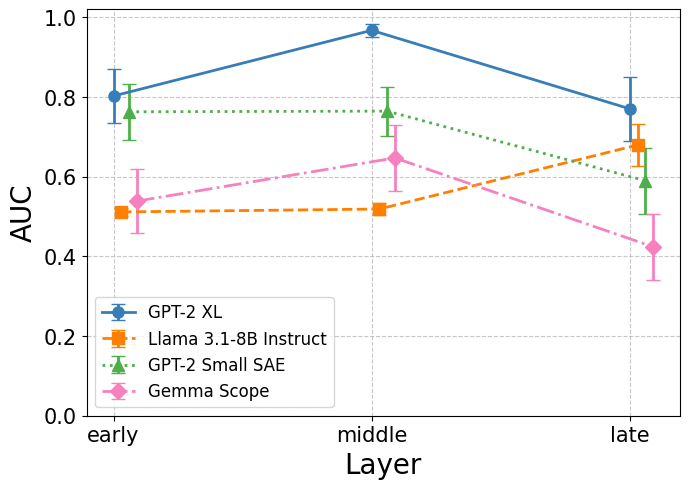

In [ ]:
x1, y1, std1 = load_model_data(df_meta_gpt2xl, metric="max_auc")
x2, y2, std2 = load_model_data(df_meta_gpt2_sae, metric="max_auc")
x3, y3, std3 = load_model_data(df_meta_llama31, metric="max_auc")
x4, y4, std4 = load_model_data(df_meta_gemma_sae, metric="max_auc")

model_xs = [x1, x2, x3, x4]
model_ys = [y1, y2, y3, y4]
model_stds = [std1, std2, std3, std4]

plt.figure(figsize=(7, 5))

# Assuming each model has 3 time points and 30 samples
n = 60
confidence_multiplier = 1.96  # for 95% confidence interval

# Example data (replace these with your real ones)
x_mapped = [0, 1, 2]
offset = 0.03

for i, (y, std, name) in enumerate(zip(model_ys, model_stds, MODEL_NAMES, strict=False)):
    # Calculate 95% confidence interval
    ci = confidence_multiplier * np.array(std) / np.sqrt(n)

    # Apply offset to avoid overlap
    x_offset = [xi + i * offset for xi in x_mapped]

    plt.errorbar(
        x_offset,
        y,
        yerr=ci,
        marker=MARKERS[i],
        linestyle=LINESTYLES[i],
        color=COLORS[i],
        capsize=5,
        label=name,
        linewidth=2,
        markersize=8,
    )

plt.ylim(0.0, 1.02)

# Set custom x-axis ticks and labels
plt.xticks([0, 1, 2], ["early", "middle", "late"], fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)

plt.xlabel("Layer", fontsize=LABEL_FONTSIZE)
plt.ylabel("AUC", fontsize=LABEL_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=LEGEND_FONTSIZE)

plt.tight_layout()
plt.savefig("plots/layers_auc.pdf", dpi=600, bbox_inches="tight", format="pdf")
# plt.savefig('plots/layers_auc.png', dpi=300, bbox_inches='tight')
# plt.savefig('plots/layers_auc.svg', dpi=300, bbox_inches='tight')
plt.show()

### Cosine Similarity Layer Comparison

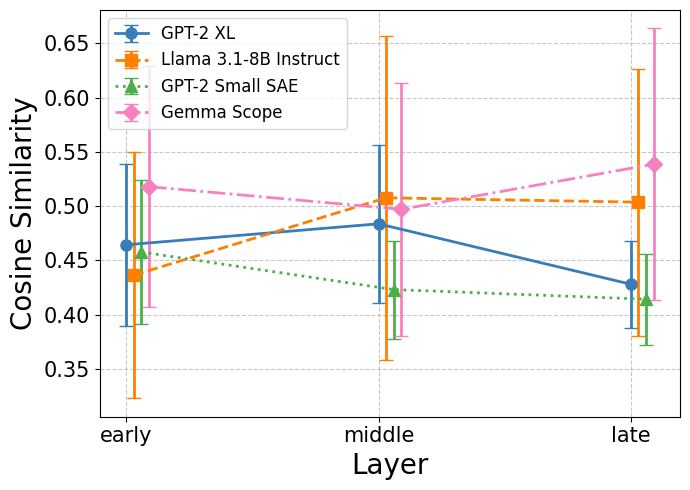

In [10]:
# Load data for each model
x1, y1, std1 = load_model_data(df_meta_gpt2xl, metric="cosine_similarity")
x2, y2, std2 = load_model_data(df_meta_gpt2_sae, metric="cosine_similarity")
x3, y3, std3 = load_model_data(df_meta_llama31, metric="cosine_similarity")
x4, y4, std4 = load_model_data(df_meta_gemma_sae, metric="cosine_similarity")

# Create lists to store model data
model_xs = [x1, x2, x3, x4]
model_ys = [y1, y2, y3, y4]
model_stds = [std1, std2, std3, std4]

# Create the plot
plt.figure(figsize=(7, 5))

# Define offset to avoid marker overlap
offset = 0.03

for i, (y, std, name) in enumerate(zip(model_ys, model_stds, MODEL_NAMES, strict=False)):
    x_mapped = [0, 1, 2]
    # Apply offset to avoid overlap
    x_offset = [xi + i * offset for xi in x_mapped]

    plt.errorbar(
        x_offset,
        y,
        yerr=std,
        marker=MARKERS[i],
        linestyle=LINESTYLES[i],
        color=COLORS[i],
        capsize=5,
        label=name,
        linewidth=2,
        markersize=8,
    )


# Set custom x-axis ticks and labels
plt.xticks([0, 1, 2], ["early", "middle", "late"], fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)

plt.xlabel("Layer", fontsize=LABEL_FONTSIZE)
plt.ylabel("Cosine Similarity", fontsize=LABEL_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=LEGEND_FONTSIZE)

## Show the plot
plt.tight_layout()
plt.savefig("plots/layers_cosine-similarity.pdf", dpi=600, bbox_inches="tight", format="pdf")
# plt.savefig('plots/layers_cosine-similarity.png', dpi=300, bbox_inches='tight')
# plt.savefig('plots/layers_cosine-similarity.svg', dpi=300, bbox_inches='tight')
plt.show()

### Random Cosine Similarity Layer Comparison

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# --- Organize data for boxplot ---
def get_boxplot_data(df, layer_groups, metric_true="cosine_similarity", metric_random="cosine_similarity_random"):
    df = df.copy()
    data = []
    for stage, layers in layer_groups.items():
        true_vals = df[df["layer"].isin(layers)][metric_true].values
        rand_vals = df[df["layer"].isin(layers)][metric_random].values
        data.extend([(stage, "True", val) for val in true_vals])
        data.extend([(stage, "Random", val) for val in rand_vals])
    return pd.DataFrame(data, columns=["Stage", "Type", "Cosine Similarity"])


# --- Define dynamic layer groups for the model ---
layer_groups_gpt2xl = {
    "early": [0],
    "middle": [20],
    "late": [40],
}

layer_groups_gpt2_sae = {
    "early": [0],
    "middle": [5],
    "late": [10],
}

layer_groups_llama31 = {
    "early": [0],
    "middle": [20],
    "late": [30],
}

layer_groups_gemma_sae = {
    "early": [0],
    "middle": [10],
    "late": [20],
}

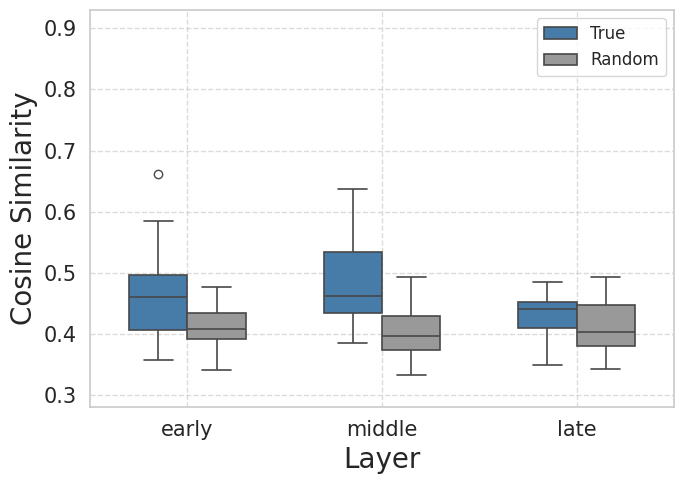

In [49]:
df_plot = get_boxplot_data(df_meta_gpt2xl, layer_groups=layer_groups_gpt2xl)

plt.figure(figsize=(7, 5))
ax = sns.boxplot(
    data=df_plot,
    x="Stage",
    y="Cosine Similarity",
    hue="Type",
    palette={"True": COLORS[0], "Random": "#999999"},
    width=0.6,
    linewidth=1.2,
)

plt.ylim(0.28, 0.93)
plt.xlabel("Layer", fontsize=LABEL_FONTSIZE)
plt.ylabel("Cosine Similarity", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="", fontsize=LEGEND_FONTSIZE)
plt.tight_layout()
plt.savefig("plots/cosine_random_gpt2-xl.pdf", dpi=600, bbox_inches="tight", format="pdf")

plt.show()


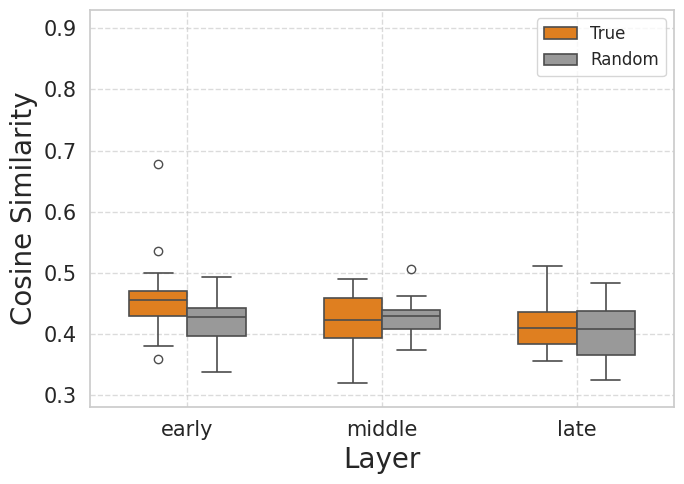

In [50]:
df_plot = get_boxplot_data(df_meta_llama31, layer_groups=layer_groups_llama31)

plt.figure(figsize=(7, 5))
ax = sns.boxplot(
    data=df_plot,
    x="Stage",
    y="Cosine Similarity",
    hue="Type",
    palette={"True": COLORS[1], "Random": "#999999"},
    width=0.6,
    linewidth=1.2,
)

plt.ylim(0.28, 0.93)
plt.xlabel("Layer", fontsize=LABEL_FONTSIZE)
plt.ylabel("Cosine Similarity", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="", fontsize=LEGEND_FONTSIZE)
plt.tight_layout()
plt.savefig("plots/cosine_random_llama31.pdf", dpi=600, bbox_inches="tight", format="pdf")

plt.show()


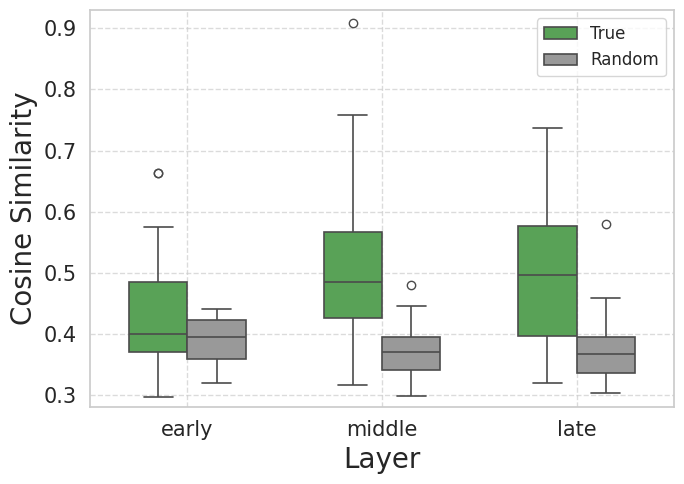

In [51]:
df_plot = get_boxplot_data(df_meta_gpt2_sae, layer_groups=layer_groups_gpt2_sae)

plt.figure(figsize=(7, 5))
ax = sns.boxplot(
    data=df_plot,
    x="Stage",
    y="Cosine Similarity",
    hue="Type",
    palette={"True": COLORS[2], "Random": "#999999"},
    width=0.6,
    linewidth=1.2,
)

plt.ylim(0.28, 0.93)
plt.xlabel("Layer", fontsize=LABEL_FONTSIZE)
plt.ylabel("Cosine Similarity", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="", fontsize=LEGEND_FONTSIZE)
plt.tight_layout()
plt.savefig("plots/cosine_random_gpt2_sae.pdf", dpi=600, bbox_inches="tight", format="pdf")

plt.show()


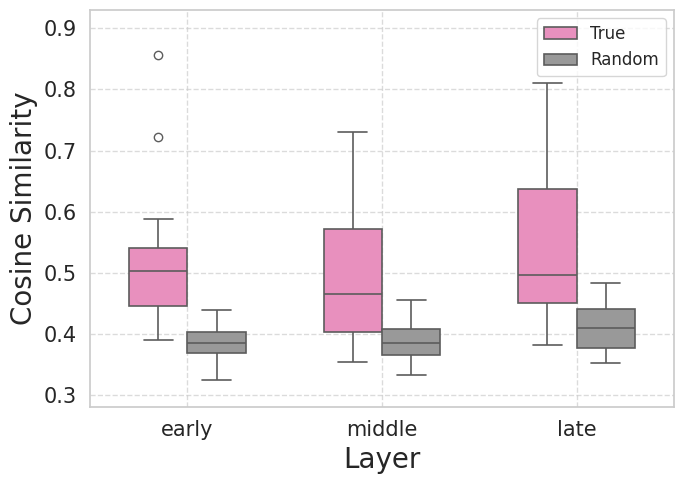

In [52]:
df_plot = get_boxplot_data(df_meta_gemma_sae, layer_groups=layer_groups_gemma_sae)

plt.figure(figsize=(7, 5))
ax = sns.boxplot(
    data=df_plot,
    x="Stage",
    y="Cosine Similarity",
    hue="Type",
    palette={"True": COLORS[3], "Random": "#999999"},
    width=0.6,
    linewidth=1.2,
)

plt.ylim(0.28, 0.93)
plt.xlabel("Layer", fontsize=LABEL_FONTSIZE)
plt.ylabel("Cosine Similarity", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="", fontsize=LEGEND_FONTSIZE)
plt.tight_layout()
plt.savefig("plots/cosine_random_gemma_sae.pdf", dpi=600, bbox_inches="tight", format="pdf")

plt.show()


## Distribution Plot

In [39]:
COLORS = ["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628", "#984ea3", "#999999", "#e41a1c", "#dede00"]
AXIS_FONTSIZE = 15

### MAD Distribution

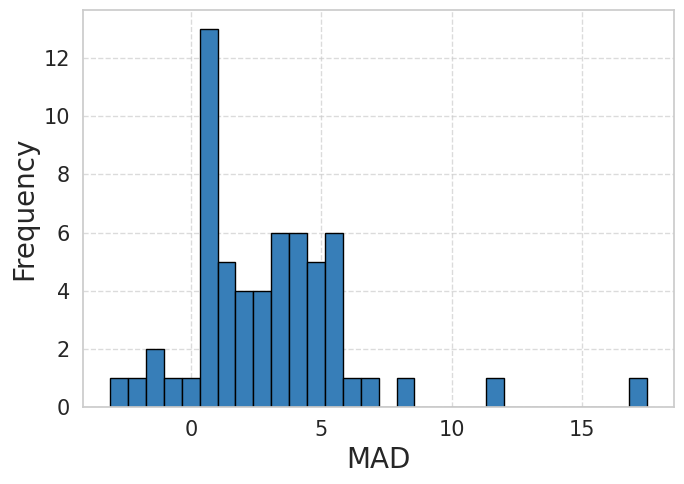

In [53]:
plt.figure(figsize=(7, 5))
plt.hist(df_meta_gpt2xl["max_mad"], bins=30, color=COLORS[0], edgecolor="black")
plt.xlabel("MAD", fontsize=LABEL_FONTSIZE)
plt.ylabel("Frequency", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("plots/mad_dist_gpt2-xl.pdf", dpi=600, bbox_inches="tight", format="pdf")
plt.show()

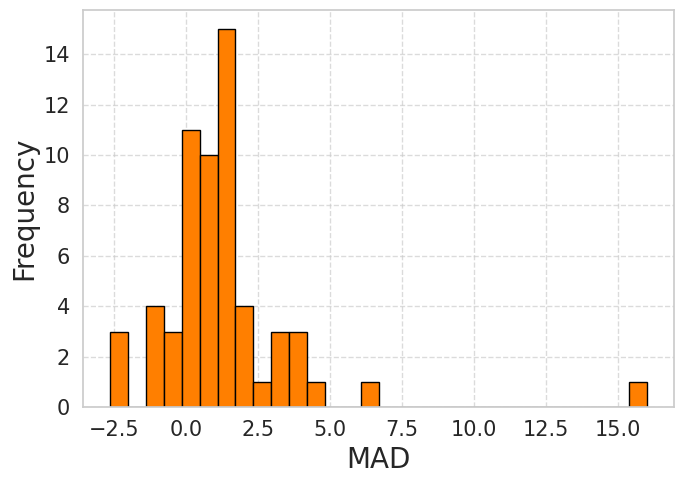

In [54]:
plt.figure(figsize=(7, 5))
plt.hist(df_meta_llama31["max_mad"], bins=30, color=COLORS[1], edgecolor="black")
plt.xlabel("MAD", fontsize=LABEL_FONTSIZE)
plt.ylabel("Frequency", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("plots/mad_dist_llama.pdf", dpi=600, bbox_inches="tight", format="pdf")
plt.show()

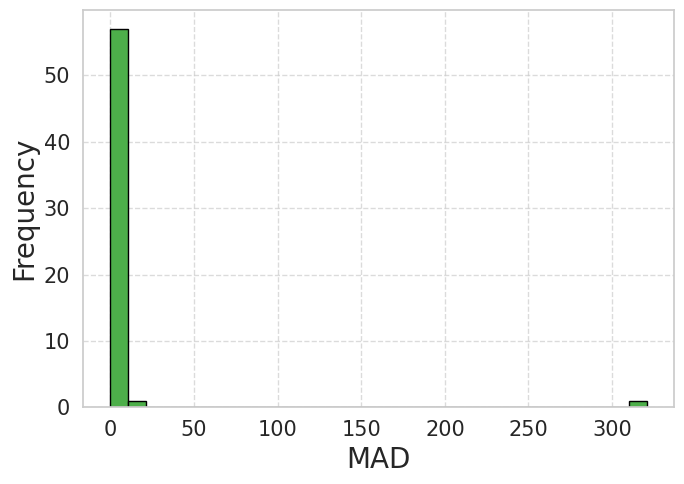

In [55]:
plt.figure(figsize=(7, 5))
plt.hist(df_meta_gpt2_sae["max_mad"], bins=30, color=COLORS[2], edgecolor="black")
plt.xlabel("MAD", fontsize=LABEL_FONTSIZE)
plt.ylabel("Frequency", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("plots/mad_dist_gpt2-sae.pdf", dpi=600, bbox_inches="tight", format="pdf")
plt.show()

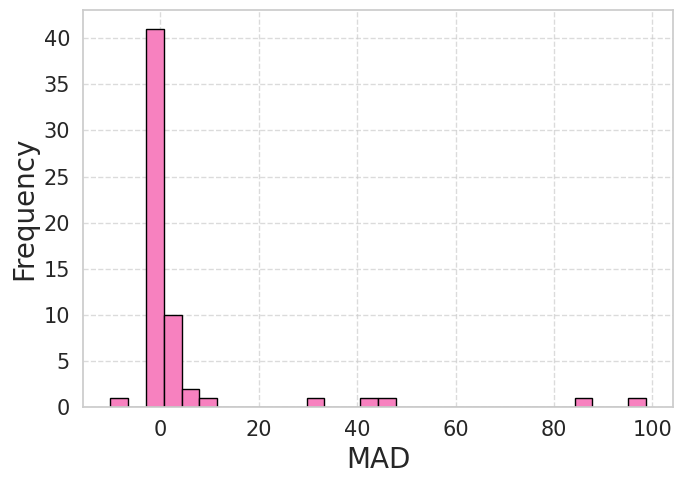

In [56]:
plt.figure(figsize=(7, 5))
plt.hist(df_meta_gemma_sae["max_mad"], bins=30, color=COLORS[3], edgecolor="black")
plt.xlabel("MAD", fontsize=LABEL_FONTSIZE)
plt.ylabel("Frequency", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("plots/mad_dist_gemma.pdf", dpi=600, bbox_inches="tight", format="pdf")
plt.show()

### AUC Distribution

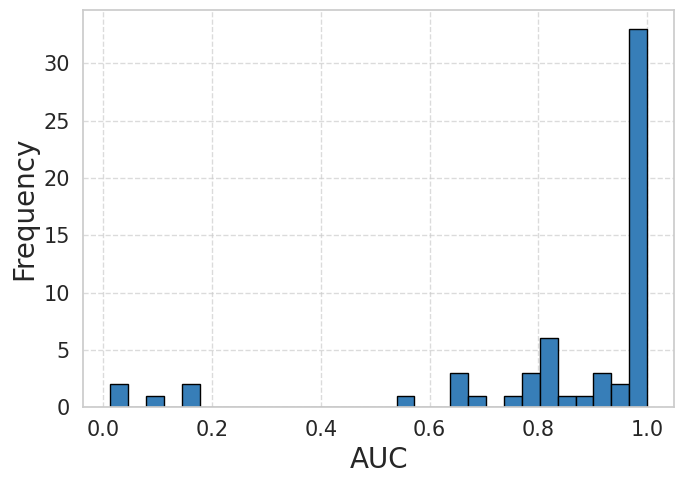

In [57]:
plt.figure(figsize=(7, 5))
plt.hist(df_meta_gpt2xl["max_auc"], bins=30, color=COLORS[0], edgecolor="black")
plt.xlabel("AUC", fontsize=LABEL_FONTSIZE)
plt.ylabel("Frequency", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("plots/auc_dist_gpt2-xl.pdf", dpi=600, bbox_inches="tight", format="pdf")
plt.show()

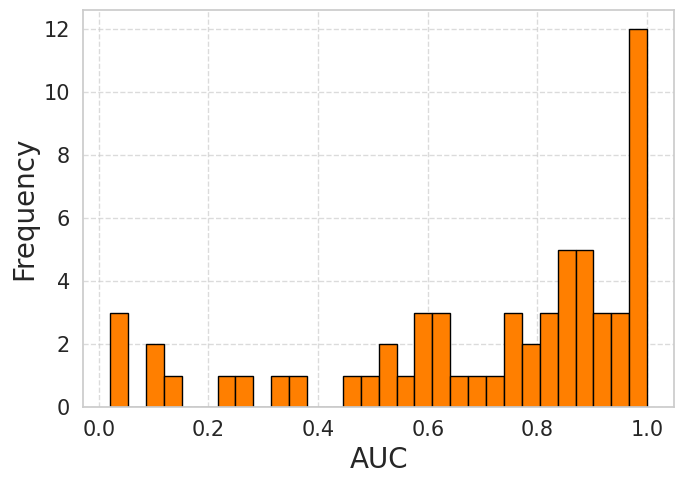

In [58]:
plt.figure(figsize=(7, 5))
plt.hist(df_meta_llama31["max_auc"], bins=30, color=COLORS[1], edgecolor="black")
plt.xlabel("AUC", fontsize=LABEL_FONTSIZE)
plt.ylabel("Frequency", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("plots/auc_dist_llama.pdf", dpi=600, bbox_inches="tight", format="pdf")
plt.show()

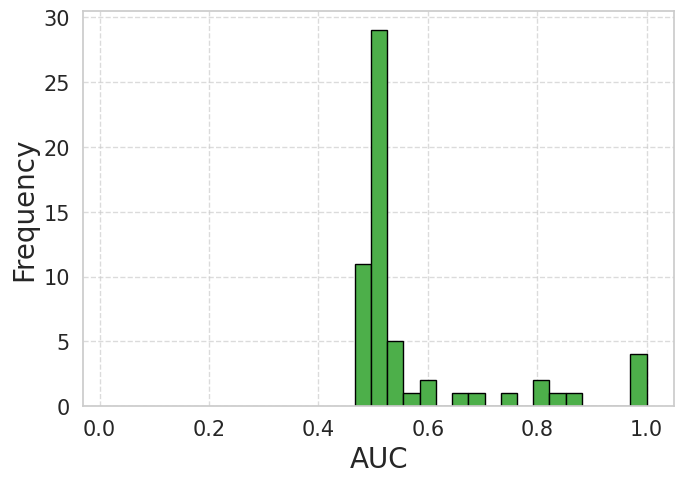

In [72]:
plt.figure(figsize=(7, 5))
plt.hist(df_meta_gpt2_sae["max_auc"], bins=18, color=COLORS[2], edgecolor="black")
plt.xlabel("AUC", fontsize=LABEL_FONTSIZE)
plt.ylabel("Frequency", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)

plt.xlim(-0.03, 1.05)

plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("plots/auc_dist_gpt2-sae.pdf", dpi=600, bbox_inches="tight", format="pdf")
plt.show()

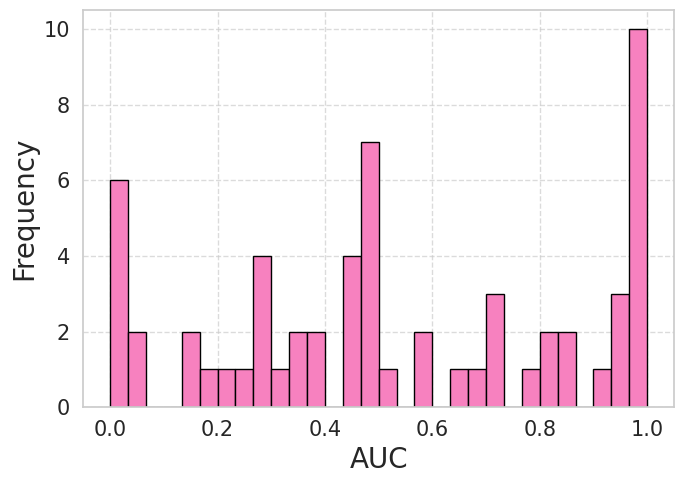

In [67]:
plt.figure(figsize=(7, 5))
plt.hist(df_meta_gemma_sae["max_auc"], bins=30, color=COLORS[3], edgecolor="black")
plt.xlabel("AUC", fontsize=LABEL_FONTSIZE)
plt.ylabel("Frequency", fontsize=LABEL_FONTSIZE)
plt.xticks(fontsize=AXIS_FONTSIZE)
plt.yticks(fontsize=AXIS_FONTSIZE)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("plots/auc_dist_gemma.pdf", dpi=600, bbox_inches="tight", format="pdf")
plt.show()